# Control Systems 1, NB03: Time Response and Stability
2024 ETH Zurich, Mark Benazet Castells, Jonas Holinger, Felix Muller, Matteo Penlington; Institute for Dynamic Systems and Control; Prof. Emilio Frazzoli


This interactive notebook is designed to introduce fundamental concepts in control systems engineering. It covers the basics of system modeling, classification, and analysis, with a focus on building intuition through visual and interactive examples.

Authors:
- Jonas Holinger; jholinger@ethz.ch
- Shubham Gupta; shugupta@ethz.ch

## Learning Objectives

After completing this notebook, you should be able to:

1. Understand how to compute the transfer function and its various forms
2. Understand the various definitions related to transfer functins and how to analyse it
3. Understand the impulse response of a system and its importance
4. Understand computing various input responses for a system

# Setup
## Installing the required packages:

In [2]:
%pip install numpy matplotlib scipy ipywidgets control IPython

Note: you may need to restart the kernel to use updated packages.


## Import the packages
The following cell imports the required packages. Run it before running the rest of the notebook.

In [5]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
import math
import ipywidgets as widgets
from scipy.integrate import odeint
from IPython.display import display, clear_output, Math
from ipywidgets import interactive


## Transfer Functions and Output Response

In Lecture 4 we observed that the response of a LTI system with respect to time is given by, 
$$
    x(t) = e^{At}x(0) + \int_0^t e^{A(t-\tau)}Bu(\tau)d\tau
$$
Where $e^{At}x(0)$ signifies the Initial condition response and $int_0^t e^{A(t-\tau)}Bu(\tau)d\tau$ signifies the forced response. The behavious can be difficult to analyse in the time doamin, hence we were introduced to transfer functions, which make use of the $s$-domain, or an extended frequency domain for analysis.


Recall that for a general LTI system given by:

$$
    \dot{x}(t) = Ax(t)+Bu(t)\\
    y(t) = Cx(t)+Du(t)
$$
the system transfer function can be given by:
$$
    G(s) = \frac{Y(s)}{U(s)} = C(sI-A)^{-1}B + D
$$

This transfer function captures the various periodic and exponential (rise and decay) components of the input and output.

While this transfer function is useful and contains a lot of information, we can rearrange this transfer function in various forms to make it easier for us to analyse.

### Transfer Function for a SISO system

For a SISO(Single Input Single Output) system, the transfer function can be written simply as a **stricly proper rational function**(degree of numerator < degree of denominator) + **direct feedtrough** like
$$
    G(s) = \frac{N(s)}{D(s)} = \frac{b_ms^m + b_{m-1}s^{m-1} + \ldots + b_0}{s^n + a_{n-1}s^{n-1} + \ldots + b_0} + d
$$
with $m<n$.

Since the numerator and denominator are polynomials, they can factorised using their roots.

*Note: a polynomial of degree $n$ with complex coefficients with always have $n$ complex roots (reals numbers are a subset of complex numbers.)*

Thus the transfer function can be written as:
$$
    G(s) = k_{rl} \cdot\frac{(s-z_1)(s-z_2)\ldots(s-z_m)}{(s-p_1)(s-p_2)\ldots(s-p_n)}
$$
This is called as the **Root Locus Form** of the transfer function, used for, as you might have guessed, the root locus analysis of th system, which will be dicussed in detail next week.  
The roots of the denominator $p_1,p_2,\ldots, p_n$ are called the **Poles** of the transfer function and roots of the numerator $z_1,z_2,\dots, z_n$ are called the **Zeros** of the transfer function. The *poles* are also the roots of the characterstic polynomial $det(sI-A)$, i.e., the poles are just the eigenvalues of $A$ and the denominator of the transfer function is the characterstic polynomial.

The form can also be rearranged to 
$$
  G(s) = k_{\text{Bode}} \cdot \frac{(\frac{s}{-z_1}+1)(\frac{s}{-z_2}+1)\ldots(\frac{s}{-z_m}+1)}{(\frac{s}{-p_1}+1)(\frac{s}{-p_2}+1)\ldots(\frac{s}{-p_n}+1)} 
$$
This is called the **Bode Form** of the transfer function.

Using the *poles* the transfer function can also be decomposed into partial fractions leading to thr **Partial Fraction Expansion** of the transfer function
$$
  G(s) = \frac{r_1}{s-p_1} + \frac{r_2}{s-p_2}+ \ldots + \frac{r_n}{s-p_n} + r_0
$$

The values $r_1\ldots r_n$ are called the **residues**. As will be discussed later, each term in the partial fraction exapansion determies a term of the impulse response of the system.

Now that we know about the vaious forms of the transfer function, how do we convert between each form.
Given any form we can alwyas convert to the basic rational functin form by multiplying everything .

From the rational function form we can convert to *Root Locus* form by finding the roots of the numerator and denominator and factorsing the polynomials. any extra multiplier are accumulated in the term $k_{rl}$.

The *Bode* form can be achived from the *Root locus* form by dividing the numerator and denominator by their respective roots
$$
  (s-p_i) = -p_i(\frac{s}{-p_i}+1)
$$
Therefore
$$
\begin{align*}
  G(s) &= k_{rl} \cdot\frac{(s-z_1)(s-z_2)\ldots(s-z_m)}{(s-p_1)(s-p_2)\ldots(s-p_n)} \\
  &= k_{rl} \cdot \frac{(-z_1)(\frac{s}{-z_1}+1)(-z_2)(\frac{s}{-z_2}+1)\ldots(-z_m)(\frac{s}{-z_m}+1)}{(-p_1)(\frac{s}{-p_1}+1)(-p_2)(\frac{s}{-p_2}+1)\ldots(-p_n)(\frac{s}{-p_n}+1)}\\
  &= k_{\text{Bode}} \cdot \frac{(\frac{s}{-z_1}+1)(\frac{s}{-z_2}+1)\ldots(\frac{s}{-z_m}+1)}{(\frac{s}{-p_1}+1)(\frac{s}{-p_2}+1)\ldots(\frac{s}{-p_n}+1)}
\end{align*}
$$

#### Cover-Up Method

To obtain the *partial function expansion* we use the Heaveside Cover-up method. The method essentially states that to calculate the residue for a pole $p_i$ "cover up"/ignore the the term $(s-p_i)$ and substitute $p_i$ in the rest of the function, Hence the name cover up method. 

Formally, for a non-repeated pole the residue is given by 
$$
    r_i = \lim_{s\rightarrow p_i}(s-p_i)G(s)
$$

For a repeated pole is becomes slightly complex
$$
    r_i = \frac{1}{(m-1)!}\lim_{s\rightarrow p_i}\frac{d^{m-1}}{ds^{m-1}}((s-p_i)^mG(s))
$$
where $m$ is the multiplicity of the pole.

Using these methods we can convert between the different forms of the transfer function.

### Examples for transfer function conversion

## Magnitude and Phase of $G(s)$

From the previous lecture we covered that the steady state output to an sinusoidal input will have the same frequency as the input, but will be scaled by the magnitude and shifted by the phase of $G(s)$. Now we want to know how to calulate the these. We can only calculate the magnitude and phase for a stable LTI-system.  

$$y_{ss}(t)=\left|G(s) \right|sin(t+\angle G(s))$$

We use the substituion $s=jw$. By doing this we we evalute the transfer function at purely imaginary values.  This specifically captures the system's response to sinusoidal inputs at frequency $\omega$, known as the frequency response of the steady state $G(j\omega)$.

 We can use the properties from complex numbers. 

#### Example
As an example of an sinuisoidal input applied to an transfer function lets consider $u(t)=sin(3t)$ and $G(s) = 3 \cdot \frac{s + 3}{(s + 2 - i)(s + 2 + i)}$. The substitution $s=3j$ is suitable for our calculation, since $\omega =3$. 

Below is a plot of the location of the poles, zero and the input  in the complex plane.
<br>
<img src="media/pole_zero_plot_with_input.png" width="500"/>

### Calculating the Magnitude $ \left| G(s) \right| $
The defintion of the magnitude of a complex number $z=a+bj$ is $\left| z \right| = \sqrt{a^2+b^2}$. The following laws will help us calculating the magnitude

$$\left| a\cdot b \right| = \left| a \right| \cdot \left| b \right|$$
$$\left| \frac{a}{b} \right| = \frac{\left| a \right|}{\left| b \right|}$$

Through the substituion in the numerator  of our transfer function  $G(s) = 3 \cdot \frac{s + 3}{(s + 2 - i)(s + 2 + i)}$ we get the complex number $$3(3j+3)$$

The magnitude of the numerator is therefore $$3(\sqrt{3^2+3^2} = 9\sqrt{2}$$
This corresponds to the length of the vector from the zero $z=-3$ to s multiplied by the gain 3.
<br>Through the substituion in the denumerator we get the complex number $$(3j+2-j)(3j+2+j) = (2j+2)(4j+2)$$
To calculate the magnitude of the denumerator we use the the law from above:
$$\left| (2j+2)\cdot (4j+2) \right| = \left| (2j+2) \right| \cdot \left| (4j+2) \right| = \sqrt{2^2+2^2}\sqrt{4^2+2^2} = 4\sqrt(10)$$

This corresponds to the length of the two vector from the two poles $-2 \pm{j}$ to $s=3j$ multiplied.
<br>We can find the magnitude of $G(j\omega)$ using one of the laws above which leaves us with $$\left| \frac{9\sqrt{2}}{4\sqrt{10}}\right| = \frac{9\sqrt{2}}{4\sqrt{10}}
$$.

Below you can se that see the graphical visualisation of the magnitude of the pole $(s + 2 + i)$ to the input $u(t)=sin(3t)$

<img src="media/pole_zero_plot_with_input_magn.png" width="500"/>



### How to calculate the Phase $ \angle G(s) $
The definiton of phase or argument of a complex number $z$ is $\theta = \tan^{-1}\left(\frac{b}{a}\right)$.

#### Quadrants of the Complex Plane
One need to be carefule, since the value of $\tan^{-1}\left(\frac{b}{a}\right)$ alone does not account for the quadrant in which the complex number could lie in. In your calculator/computer the function $atan2$ corrects for this.

However for calculating the phase by hand, the following cases are need to distinguished:
<img src="media/complex_quadrants.png" width="300"/>


1. **Quadrant I**: $a > 0,b > 0$
   - $\theta = \tan^{-1}\left(\frac{b}{a}\right)$

2. **Quadrant II**: $a < 0,b > 0$ 
   - $\theta = \tan^{-1}\left(\frac{b}{a}\right) + 180^\circ $

3. **Quadrant III**: $a < 0,b < 0$
   - $\theta = \tan^{-1}\left(\frac{b}{a}\right) - 180^\circ $


4. **Quadrant IV**: $a > 0, \, b < 0$
   - $\theta = \tan^{-1}\left(\frac{b}{a}\right)$


For calculating we can use the following laws. c is a constant.
<br>
$$\angle (a \cdot b) = (\angle a) + (\angle b)$$
$$\angle (\frac{a}{b})= \angle a-\angle b$$
<br>
$$\angle c\cdot (1 + 1j)=\tan^{-1}(\frac{1}{1})= 45^{\circ}$$
$$\angle (c \cdot j)=\tan^{-1}(\frac{j}{0})=\tan^{-1}(\infty) = 90^{\circ}$$
$$\angle (c)=\tan^{-1}(\frac{0}{c})=\tan^{-1}(0) = 0^{\circ}$$
<br>
$$\tan^{-1}(-x) = -\tan^{-1}(x)$$

We can calculate the phase of $G(s)$ witht the following steps. Using the law $\angle (\frac{a}{b})= \angle a-\angle b$ and our substitution $s=3j$ we get

$$\angle G(j3) = \angle(3 + 3j)) - (\angle(2j+2)+\angle(4j+2)$$
We know that $\angle(3 + 3j)$ has the same angle as $\angle(1 + 1j)$ and $\angle(2j+2)$.The angle is therefore $45^{\circ}$.
<br>
The angle of $\angle(2 + 4j)$ can be calculated using $ \tan^{-1}\left(\frac{4}{2}\right) = \tan^{-1}(2) \approx 63.43^\circ$
<br>
Therefore total phase of $G(j3)$ is = $45^{\circ}-(63.43^\circ+45^{\circ})= -63.43^\circ$.

Below we see that the phase of a pole/zero represents the angle between the real axis and the vector from the pole/zero to the input.
<img src="media/pole_zero_plot_with_input_phase.png" width="500"/>

### Superposition
The properties of superposition still apply. For the steady-state output corresponding to the input $y(t)=5sin(3t)+4cos(5t)$ , we can express it as follows:$$y_{ss} = 5(\left| G(3j) \right|+ \cdot sin(3t+\angle G(3j))) + 4(\left| G(5j) \right|+ \cdot cos(5t+\angle G(5j)))$$

### Visualisation

In the following interactive example you can input a transfer function and a frequency $\omega$ and get the magnitude,phase and a graph of the response out of it. To input your own transfer function, use this : [7,2,3,5] = $7s^3*2s^2*3s*5$ and click update. Try calculating the phase and magnitude by hand and then check if it matches the result. You need to click the button to update the graph.

<TransferFunction>: sys[46]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   3 s + 9
-------------
s^2 + 4 s + 5

Magnitude at ω = 3.0: |G(jω)| = 1.01
Phase at ω = 3.0: ∠G(jω) = -63.43 degrees



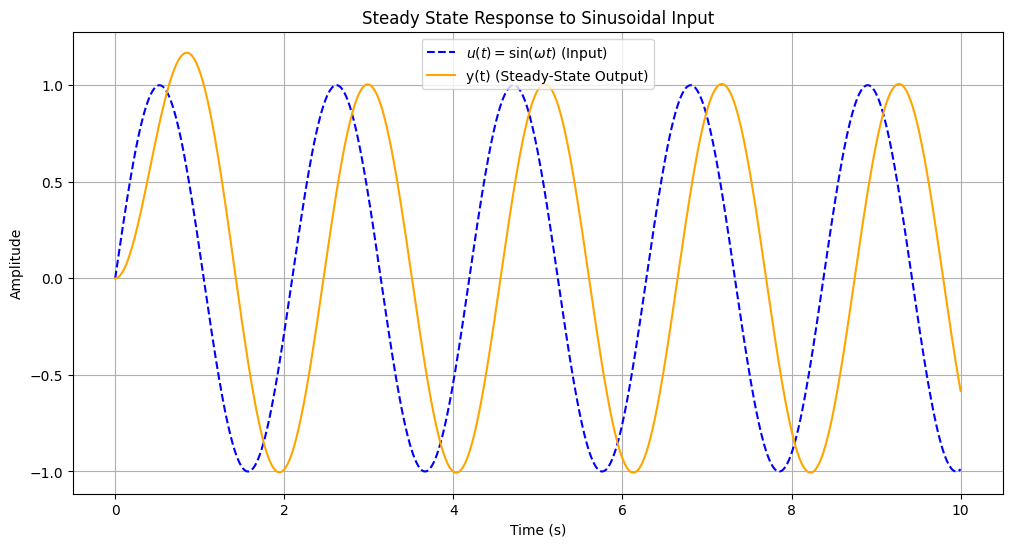

In [10]:
G = None

def plot_response_mp(omega):
    global G
    # Time vector
    t = np.linspace(0, 10, 1000)
    
    u = np.sin(omega * t)
    
    t_out, y_out = ct.forced_response(G, T=t, U=u)

    plt.figure(figsize=(12, 6))
    
    plt.plot(t, u, label=r'$u(t) = \sin(\omega t)$ (Input)', color='blue', linestyle='--')
    
    plt.plot(t_out, y_out, label='y(t) (Steady-State Output)', color='orange')
    
    plt.title(f'Steady State Response to Sinusoidal Input')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


def calculate_magnitude_phase(omega):
    global G
    s = 1j * omega
    G_s = G(s)
    magnitude = abs(G_s)
    phase = np.angle(G_s, deg=True)
    return magnitude, phase

def update_transfer_function(numerator_input, denominator_input):
    global G

    try:
        numerator = [float(n) for n in numerator_input.split(',')]
        denominator = [float(d) for d in denominator_input.split(',')]
        
        G = ct.TransferFunction(numerator, denominator)
        
        # Check stability
        poles = ct.poles(G)
        is_stable = all(np.real(pole) < 0 for pole in poles)
        if not is_stable:
            print(f"Your system is unstable, try changing the poles")
            return
        
        # Display the transfer function, magnitude, and phase
        magnitude, phase = calculate_magnitude_phase(omega_slider.value)
        clear_output(wait=True)
        display(ui)
        
        print(f"{G}")
        print(f"Magnitude at ω = {omega_slider.value}: |G(jω)| = {magnitude:.2f}")
        print(f"Phase at ω = {omega_slider.value}: ∠G(jω) = {phase:.2f} degrees\n")
        plot_response_mp(omega_slider.value)

    except ValueError:
        print("Please enter valid numbers separated by commas.")

numerator_input = widgets.Text(
    value='3,9',  
    description='Numerator:',
)

denominator_input = widgets.Text(
    value='1,4,5', 
    description='Denominator:',
)

update_button = widgets.Button(description="Update", layout=widgets.Layout(margin='0 auto', width='auto')) 
update_button.on_click(lambda b: update_transfer_function(numerator_input.value, denominator_input.value))

omega_slider = widgets.FloatSlider(
    value=3.0,  
    min=0.1,    
    max=10.0,   
    step=0.1,   
    description='ω:',
    continuous_update=True  
)
left_column = widgets.VBox([numerator_input, denominator_input])
right_column = widgets.VBox([omega_slider, update_button])

ui = widgets.HBox([left_column, right_column])

interactive_plot = interactive(
    plot_response_mp, 
    omega=omega_slider,

)

display(ui)


update_transfer_function(numerator_input.value, denominator_input.value)


Transfer Function: <TransferFunction>: sys[4]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   3 s + 9
-------------
s^2 + 4 s + 5



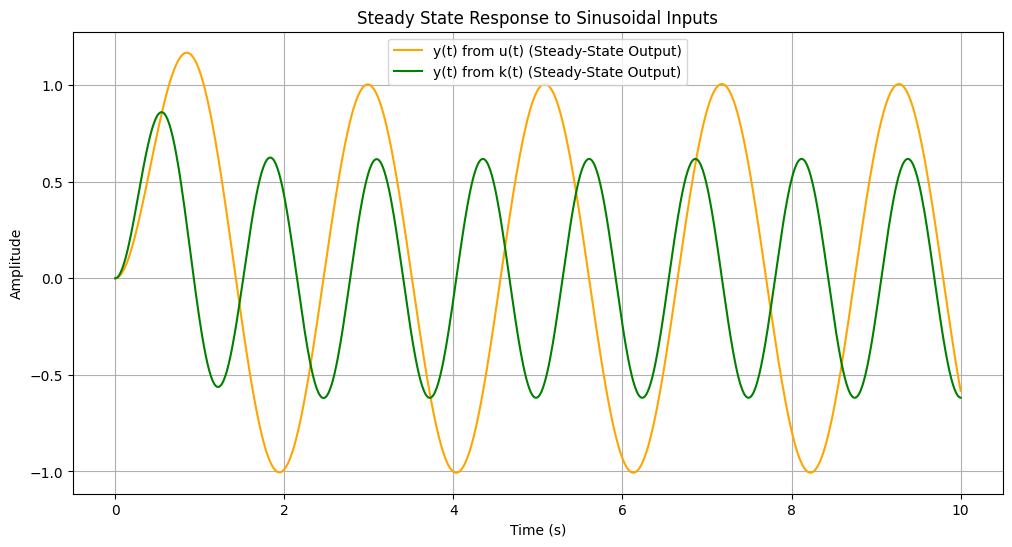

In [8]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

# Initialize global transfer function
G = None

# Define the plot function
def plot_response_multi(a, b, c, d):
    global G
    # Time vector
    t = np.linspace(0, 10, 1000)
    
    # Define the inputs u(t) = a*sin(bt) and k(t) = c*sin(dt)
    u = a * np.sin(b * t)  # First input
    k = c * np.sin(d * t)  # Second input

    # Calculate the system responses
    t1_out, y1_out = ct.forced_response(G, T=t, U=u)
    t2_out, y2_out = ct.forced_response(G, T=t, U=k)

    # Create the plot
    plt.figure(figsize=(12, 6))
    
    plt.plot(t1_out, y1_out, label='y(t) from u(t) (Steady-State Output)', color='orange')
    plt.plot(t2_out, y2_out, label='y(t) from k(t) (Steady-State Output)', color='green')

    # Plot settings
    plt.title('Steady State Response to Sinusoidal Inputs')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

def update_transfer_function(numerator_input, denominator_input):
    global G

    try:
        numerator = [float(n) for n in numerator_input.split(',')]
        denominator = [float(d) for d in denominator_input.split(',')]
        
        G = ct.TransferFunction(numerator, denominator)
        
        # Check stability
        poles = ct.poles(G)
        is_stable = all(np.real(pole) < 0 for pole in poles)
        if not is_stable:
            print("Your system is unstable, try changing the poles.")
            return
        
        # Display the transfer function
        clear_output(wait=True)
        display(ui)
        print(f"Transfer Function: {G}")

        # Call the plot function to update the plot
        plot_response_multi(a_slider.value, b_slider.value, c_slider.value, d_slider.value)

    except ValueError:
        print("Please enter valid numbers separated by commas.")

# Input parameter sliders
a_slider = widgets.FloatSlider(value=1.0, min=-5.0, max=5.0, step=0.1, description='Amplitude (a):')
b_slider = widgets.FloatSlider(value=3.0, min=0.1, max=10.0, step=0.1, description='Frequency (b):')
c_slider = widgets.FloatSlider(value=1.0, min=-5.0, max=5.0, step=0.1, description='Amplitude (c):')
d_slider = widgets.FloatSlider(value=5.0, min=0.1, max=10.0, step=0.1, description='Frequency (d):')

update_button = widgets.Button(description="Update", layout=widgets.Layout(margin='0 auto', width='auto')) 

update_button.on_click(lambda b: update_transfer_function(numerator_input.value, denominator_input.value))

# Transfer function input
numerator_input = widgets.Text(
    value='3,9',  
    description='Numerator:'
)

denominator_input = widgets.Text(
    value='1,4,5', 
    description='Denominator:'
)

# Create the interactive plot
interactive_plot = widgets.interactive(
    plot_response_multi, 
    a=a_slider,
    b=b_slider,
    c=c_slider,
    d=d_slider
)

# Layout for the UI
left_column = widgets.VBox([numerator_input, denominator_input, update_button])
right_column = widgets.VBox([a_slider, b_slider, c_slider, d_slider])

ui = widgets.HBox([left_column, right_column])

# Display the UI
display(ui)

# Initial transfer function update
update_transfer_function(numerator_input.value, denominator_input.value)


## Transient response

In order to understand the effect of poles and zeros on transient behaviour, we apply a variety of different standart test inputs to our system.

### Unit Impulse Input
The unit impulse Input $u(t)=\delta(t)$, is defined as:
$$
\delta(t) =
\begin{cases}
\infty & \text{if } t = 0 \\
0 & \text{if } t \neq 0
\end{cases}
$$
with the property:
$$
\int_{-\infty}^{\infty} \delta(t) \, dt = 1
$$


### Impulse Response

In the lecture we derived,that the impulse response corresponds to an inital condition response with $x(0)=B$.
For a more innuitive understanding we can consider the output of a general LTI-system $Y(s)=G(s)U(s)$ and remember that the Laplace-Transformation of the unit impulse is 1. By setting $U(t)=1$ we get $Y(S)=G(s)$ which corresponds to the inital condition response of our system.

 
The transfer function of a state-space model of a scalar system first order system ($A=a, B=b, C=c, D=0$) is $$G(s) = \frac{r}{s-a}$$ with $r=bc$.
The response to an unit impulse (or to an initial condition $x(0) = b$) has the form $y(t)=re^{at}$.<br>
If we assume no repeated poles, we can write $G(s)$ in the partial fraction form:
$$ G(s)=\frac{r_{1}}{s-p_{1}}+\frac{r_{2}}{s-p_{2}}+...+\frac{r_{n}}{s-p_{n}}$$
We know that the impulse response will look like this for a higher order system due to linearity:
$$y(t)=r_{1}e^{p_1t}+r_{2}e^{p_2t}+..+r_{n}e^{p_nt}$$



#### Visualisation
Try adding diffferent poles with different resiudes $r_i$. Notice that $p_n$ can be  a complex number. A complex pole has the form $p_i=\sigma_i+j\omega_i$ and oscillitates at the frequency $\omega_i$. Complex poles will automatically be inpuet as complex conjugate pairs. Notice how the reponse changes, when changing $r_i$. You can see the effect of each added pole to the total response is dependent of $r_i$.


Poles = []
Residues = []


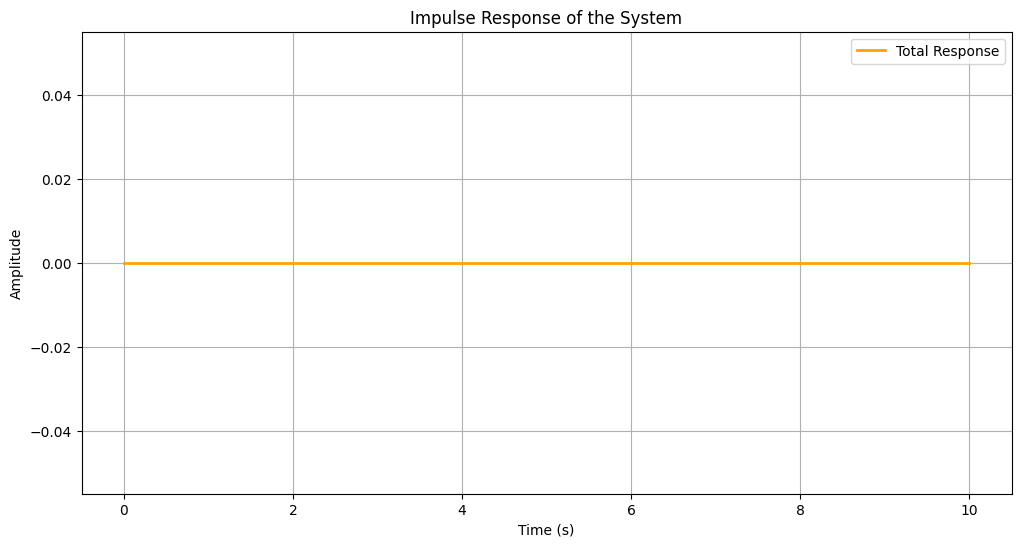

In [11]:
poles = []
residues = []

def update_response_poles():
    clear_output(wait=True)

    # Time vector
    t = np.linspace(0, 10, 1000)
    
    y_total = np.zeros_like(t, dtype=np.complex128) 
    for pole, residue in zip(poles, residues):
        y_total += residue * np.exp(pole * t)
        
    print(f"Poles = {poles}")
    print(f"Residues = {residues}")
    plt.figure(figsize=(12, 6))
    plt.plot(t, y_total.real, label='Total Response', color='orange', linewidth=2)
    plt.title('Impulse Response of the System')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)

    for pole, residue in zip(poles, residues):
        y_pole = residue * np.exp(pole * t)  
        plt.plot(t, y_pole.real, linestyle='--', label=f'Response for r: {residue} and Pole at: {pole}')
        print(f"Pole: {pole}, Residue: {residue}")

    plt.legend()
    display(ui)
    plt.show()

def add_pole_residue(pole_input, residue_input):
    try:
        pole = complex(pole_input)
        residue = float(residue_input)  
        poles.append(pole)
        residues.append(residue)
        
        if np.imag(pole) != 0:
            poles.append(np.conj(pole))
            residues.append(residue) 
    
        update_response_poles()
    except ValueError:
        print("Please enter a valid number for both the pole and the residue.")

pole_input = widgets.Text(
    description='',
    placeholder='Enter a pole (e.g., -1, -2+1j)',
    layout=widgets.Layout(margin='0 auto', width='auto')
)
residue_input = widgets.Text(
    description='',
    placeholder='Enter a residue (e.g., 1, -0.5)',
    layout=widgets.Layout(margin='0 auto', width='auto')
)

add_button = widgets.Button(description="Add Pole and Residue", layout=widgets.Layout(margin='0 auto', width='auto'))
add_button.on_click(lambda b: add_pole_residue(pole_input.value, residue_input.value))

ui = widgets.VBox([pole_input, residue_input, add_button])

display(ui)

update_response_poles()


### Unit Step Input
The unit step function, $u(t)$, is defined as:
$$
u(t) =
\begin{cases}
0 & \text{if } t < 0 \\
1 & \text{if } t \geq 0
\end{cases}
$$
which correspond to $u(t)=e^{0t}$.

#### Unit step Response
We already know that the response to the unit step is $$y_{\text{step}}(t) = \int_{0}^{t} C e^{A(t - \tau)} B \, d\tau = -C A^{-1} B + C A^{-1} e^{A t} B$$
For a first order system, the response can be calculated as following: $$y_{step}=y_{ss}(t)(1-e^{at})$$ with $y_{ss}=G(0)=CA^{-1}B$.


The step response is the steady-state response minus a scaled impulse response

#### Visualisation

Below you can input your system as a transfer function and see the difference between the unit step and the impulse response.




In [ ]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define a function to create the transfer function and plot responses
def plot_responses(numerator, denominator):
    # Create the transfer function
    system = ct.TransferFunction(numerator, denominator)
    
    # Define the time vector
    t = np.linspace(0, 10, 500)
    
    # Compute the step response
    t_step, y_step = ct.step_response(system, t)
    
    # Compute the impulse response
    t_impulse, y_impulse = ct.impulse_response(system, t)
    
    # Plot both responses on the same graph
    plt.figure(figsize=(10, 6))
    plt.plot(t_step, y_step, label='Step Response', color='b')
    plt.plot(t_impulse, y_impulse, label='Impulse Response', color='r')
    plt.title('Step and Impulse Response')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

# Widgets for user input of numerator and denominator coefficients
numerator_input = widgets.Text(value='[1]', description='Numerator:')
denominator_input = widgets.Text(value='[1, 2, 1]', description='Denominator:')

# Function to update the plot based on user input
def update_plot(numerator_str, denominator_str):
    # Parse the input strings as lists
    try:
        numerator = eval(numerator_str)
        denominator = eval(denominator_str)
        plot_responses(numerator, denominator)
    except Exception as e:
        clear_output()
        display(widgets.HTML(f"<b>Error:</b> {e}"))

# Set up the interactive widget
interactive_plot = interactive(update_plot, numerator_str=numerator_input, denominator_str=denominator_input)

# Display the input fields and plot
display(interactive_plot)


In [ ]:
maybe plot differention/integrator
import control as ct
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output, Math
from ipywidgets import interactive

# Define time vector
t = np.linspace(0, 10, 500)

# Define input signals
step_input = np.ones_like(t)
impulse_input = np.zeros_like(t)
impulse_input[0] = 1 / (t[1] - t[0])  # Approximate impulse as high value at t=0
ramp_input = t
second_order_ramp_input = 0.5 * t ** 2

# Define integrator and pseudo-differentiator transfer functions
integrator = ct.TransferFunction([1], [1, 0])          # 1/s
alpha = 1e-4                                           # Small constant for pseudo-differentiator
pseudo_differentiator = ct.TransferFunction([1, 0], [1, alpha]) # s/(s + alpha)

# Define a function to simulate and plot responses for each system and input
def plot_responses(system, system_name):
    # Compute responses for each input
    _, y_step = ct.forced_response(system, T=t, U=step_input)
    _, y_impulse = ct.forced_response(system, T=t, U=impulse_input)
    _, y_ramp = ct.forced_response(system, T=t, U=ramp_input)
    _, y_second_order_ramp = ct.forced_response(system, T=t, U=second_order_ramp_input)
    
    # Plot responses
    plt.figure(figsize=(12, 8))
    
    # Step response
    plt.subplot(2, 2, 1)
    plt.plot(t, y_step)
    plt.title(f'{system_name} - Step Response')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    
    # Impulse response
    plt.subplot(2, 2, 2)
    plt.plot(t, y_impulse)
    plt.title(f'{system_name} - Impulse Response')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    
    # Ramp response
    plt.subplot(2, 2, 3)
    plt.plot(t, y_ramp)
    plt.title(f'{system_name} - Ramp Response')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    
    # Second-order ramp response
    plt.subplot(2, 2, 4)
    plt.plot(t, y_second_order_ramp)
    plt.title(f'{system_name} - Second-order Ramp Response')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Create interactive widgets
system_selector = widgets.Dropdown(
    options={'Integrator': integrator, 'Pseudo-Differentiator': pseudo_differentiator},
    value=integrator,
    description='System:'
)

# Function to update the plot based on selected system
def update_plot(system):
    system_name = 'Integrator' if system == integrator else 'Pseudo-Differentiator'
    plot_responses(system, system_name)

# Display the interactive widget
interactive_plot = interactive(update_plot, system=system_selector)
display(interactive_plot)



### Effect of zeros on the response  

While poles $p_i$ determine the terms exponents in the response of a system, zeros $z_i$ influence the residues and, hence, the amplitude of these terms. The zeros of a system modify the magnitudes of the residues $r_i$ associated with each pole. 


#### Pole-Zero Cancellationl
Adding a zero near a pole can reduce the effect of the pole. When a zero matches a pole exactly, the effective resiude $r_i$ is zero. This means that the pole has no inpact on the systems output response, it can neither be observed or controlled. This can cause problems if the cancelled out pole is unstable.  

As an example if you have your system in the state-space form with the matrices $$ A=\begin{bmatrix} 0 & 1 \\ 2 & 3 \end{bmatrix} B=\begin{bmatrix} 0 \\ 1 \end{bmatrix} C = \begin{bmatrix} 2 & -1 \end{bmatrix} D =0$$ you can calculate the eigenvalues of the A matrix, which are $\lambda=4, \lambda = -1$ and come to the conclusion that the system is unstable. However if you calculate the transfer function and perform a pole-zero cancellation, one could come to the conclusion that the system is stable. $$G(s) = \frac{2(s - 4)}{(s - 4)(s + 1)} = \frac{2}{s + 1}$$ Pole-Zero cancellation of unstable poles should be avoided since it can lead to unpredictable behaviour and mask unstable dynamics in a system.

#### Zero as derivative action
Zeros in a transfer function can behave similar to a differentiator.If we multiply a transfer function $\tilde{G}(s)$ with a zero, we get $G(s) = (\frac{s}{-z} + 1) \tilde{G}(s)$. We can reange it to see that the second part $\frac{s}{-z} \tilde{G}(s)$ introduces a term smiliar to the differentiator $G(s) \cdot s$. The output is also effected by the rate of change of the input. For an impulse response we get $y(t) = \tilde{y}(t) + \frac{1}{-z} \frac{d\tilde{y}(t)}{dt}$, we have an anticipatory effect on the system. 

#### Minimum-Phase vs Non-Minimum-Phase System
As we learned zeros introduce a deriavtive effect to our system. If at least one zero lies in the right half of the complex part the derivative action is negative. This results in counterintuitiv behaviours. While the stability is preserved, the output can move in the wrong direction initally. Non-Minimum-Phase system are difficult to controll and should be avoided if possible.

#### Visualisation

Try out how the response changes if the zero gets larger or smaller. Notice how the derivative affect gets stronger when you approach the imaginary axis.




In [ ]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Function to create the transfer function and plot the step response and pole-zero map
def plot_system(real_zero, real_pole, imag_pole):

    if real_zero == 0:
        numerator = [1]  
    else:
        # Adjust zero for plotting as negative
        adjusted_zero = real_zero
        numerator = [-1 * (1 / adjusted_zero), 1]  # Coefficients for (b/z + 1)

    # Define poles
    pole1 = complex(real_pole, imag_pole)  # First pole
    pole2 = complex(real_pole, -imag_pole)  # Conjugate pole

    # Create the transfer function: G(s) = (b/z + 1) / (s^2 + a1*s + a0)
    b = 1  # You can add a slider for b if needed
    denominator = [1, -2 * np.real(pole1), np.abs(pole1)**2]  # Using pole properties for the denominator
    system = ct.TransferFunction(numerator, denominator)

    # Generate time vector for response
    t = np.linspace(0, 10, 100)

    # Compute step response using step_response
    t, y = ct.step_response(system, T=t)
    #t,y = ct.impulse_response(system, t)
    # Plotting step response
    plt.figure(figsize=(12, 6))

    # Step response plot
    plt.subplot(1, 2, 1)
    plt.plot(t, y)
    plt.title('Step Response of the System')
    plt.xlabel('Time (s)')
    plt.ylabel('Response')
    plt.grid()
    plt.xlim(0, 4)
    plt.ylim(min(y) - 0.1, max(y) + 0.1)

    # Pole-Zero Plot
    plt.subplot(1, 2, 2)
    if real_zero != 0:
        plt.scatter(adjusted_zero, 0, color='blue', marker='o', label='Zero')  # Display zero as negative
    else:
        plt.scatter(0, 0, color='blue', marker='o', label='Zero at Origin')  # Indicate zero at origin

    # Display poles as conjugate pairs
    plt.scatter(np.real(pole1), np.imag(pole1), color='red', marker='x', label='Pole 1')
    plt.scatter(np.real(pole2), np.imag(pole2), color='green', marker='x', label='Pole 2 (Conjugate)')
    
    # Axes and grid
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.title('Pole-Zero Map')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.grid()
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Create interactive sliders for zero and pole parameters
real_zero_slider = widgets.FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.1, description='Real Zero:')
real_pole_slider = widgets.FloatSlider(value=-3.0, min=-5.0, max=0.0, step=0.1, description='Real Pole:')
imag_pole_slider = widgets.FloatSlider(value=2.3, min=-5.0, max=5.0, step=0.1, description='Imaginary Pole:')

# Create the interactive plot
interactive_plot = widgets.interactive(plot_system,
                                       real_zero=real_zero_slider,
                                       real_pole=real_pole_slider,
                                       imag_pole=imag_pole_slider)

# Display the interactive plot
display(interactive_plot)


In [ ]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

# Function to update the plot based on slider values
def update_plot(z, a, c):
    # Define the transfer function H(s) = (s - z) / ((s - (a + 1j * c)) * (s - (a - 1j * c)))
    num = [1, -z]  # Numerator: s - z
    den = [1, -2*a, a**2 + c**2]  # Denominator: (s - (a + 1j * c))(s - (a - 1j * c))
    
    system = ct.TransferFunction(num, den)

    # Step response
    t, y = ct.step_response(system)

    # Calculate poles and zeros
    poles = ct.pole(system)
    zeros = ct.zero(system)

    # Clear previous plots
    plt.clf()

    # Plot step response
    plt.subplot(1, 2, 1)
    plt.plot(t, y)
    plt.title('Step Response')
    plt.xlabel('Time (s)')
    plt.ylabel('Response')
    plt.xlim(0, 10)  # Fix the x-axis scale
    plt.ylim(-0.1, 1.1)  # Fix the y-axis scale
    plt.grid()

    # Plot poles and zeros
    plt.subplot(1, 2, 2)
    plt.scatter(np.real(zeros), np.imag(zeros), color='blue', label='Zeros', marker='o')
    plt.scatter(np.real(poles), np.imag(poles), color='red', label='Poles', marker='x')
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.title('Poles and Zeros')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.xlim(-5, 5)  # Keep constant scale
    plt.ylim(-5, 5)  # Keep constant scale
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Display the transfer function
    transfer_function_str = f"H(s) = ({num[1]}s + {num[0]}) / ((s - ({a} + j*{c}))(s - ({a} - j*{c})))"
    print(transfer_function_str)

# Create sliders for z, a, and c
z_slider = widgets.FloatSlider(value=0, min=-5, max=5, step=0.1, description='Zero (z)')
a_slider = widgets.FloatSlider(value=1, min=-5, max=5, step=0.1, description='Pole (a)')
c_slider = widgets.FloatSlider(value=1, min=0, max=5, step=0.1, description='Imaginary Part (c)')

# Create interactive plot
interactive_plot = widgets.interactive(update_plot, z=z_slider, a=a_slider, c=c_slider)
display(interactive_plot)


## Response Of a Spring Mass Damper System


![Spring Damper System](media/spring_mass.jpg)

The spring mass damper system is a classic linear system used in systems theory. The equations for the same can be given by:

$$
    \dot{x}(t) = \begin{bmatrix} \dot{x_1} \\ \dot{x_2} \end{bmatrix} = \begin{bmatrix} x_2 \\ -\omega_0^2\cdot x_1(t) - 2\delta\omega_0 \cdot x_2(t) + \omega_0^2 \cdot u(t)\end{bmatrix}
$$
with the initial condition $x_1(0) = x_2(0) = 0$ and $\delta,\omega_0\in \mathbb{R}_{\geq 0}$
and the output of the system is 
$$ y(t) = x_1(t)$$


This can be written in the state space form as 
$$
    \begin{align*}
        \dot{x}(t) &= \begin{bmatrix} 0 & 1 \\ -\omega_0^2 & - 2\delta\omega_0\end{bmatrix} x(t) + \begin{bmatrix} 0\\ \omega_0^2\end{bmatrix} u(t)\\ \\
        y(t) &= \begin{bmatrix} 1 & 0\end{bmatrix} x(t) + 0\cdot u(t)
    \end{align*}
$$

The transfer function for this example can be written as:
$$

\begin{align*}
    G(s) = C(sI-A)^{-1}B + D &= \begin{bmatrix} 1 & 0\end{bmatrix}\left( sI - \begin{bmatrix} 0 & 1 \\ -\omega_0^2 & - 2\delta\omega_0\end{bmatrix} \right)^{-1}\begin{bmatrix} 0\\ \omega_0^2\end{bmatrix} + 0\\
    &= \begin{bmatrix} 1 & 0\end{bmatrix}\left( \begin{bmatrix} sI + 2\delta\omega_0  & 1 \\ -\omega_0^2 & s\end{bmatrix} \right)\begin{bmatrix} 0\\ \omega_0^2\end{bmatrix}\\
    &= \frac{\omega_0^2}{s^2 + 2\delta\omega_0 s}
\end{align*}
$$

Now try varyig the $\delta$ parameter and see how the see how the step response of the system changes:

* When does the system output behaviour change? On what values of $\delta$.
* Does $\omega$ value change system behaviour?

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
from ipywidgets import FloatSlider, interactive, HBox, VBox, Label
from IPython.display import display, clear_output

# Define time vector for the response
t = np.linspace(0, 10, 1000)  # Time from 0 to 10 seconds


def plot_responses(delta, omega_0):
    clear_output(wait=True)  # Clears the previous output to update the plot

    num = [omega_0**2]  # Numerator remains the same: 2*(s + 1)
    den = np.poly1d([1, 2*delta*omega_0, omega_0**2])  # Denominator is based on poles
    # print("Characterstic Polynomial:"+ str(den))
    system = ctrl.TransferFunction(num, den.c)

    # # Compute impulse response
    # t_impulse, y_impulse = ctrl.impulse_response(system, T=t)
    
    # Compute step response
    t_step, y_step = ctrl.step_response(system, T=t)

    # Plot impulse response
    plt.figure(figsize=(18, 6))

    # # Impulse Response
    # plt.subplot(1, 3, 1)
    # plt.plot(t_impulse, y_impulse)
    # plt.title('Impulse Response')
    # plt.xlabel('Time (s)')
    # plt.ylabel('Response')
    # plt.grid()

    # Step Response
    plt.subplot(1, 3, 2)
    plt.plot(t_step, y_step, color='orange')
    plt.title('Step Response')
    plt.xlabel('Time (s)')
    plt.ylabel('Response')
    plt.grid()

    # # Pole-Zero Plot
    # plt.subplot(1, 3, 3)
    # current_poles = ctrl.pole(system)
    # current_zeros = ctrl.zero(system)
    # plt.scatter(np.real(current_zeros), np.imag(current_zeros), marker='o', label='Zeros', color='blue', s=100)
    # plt.scatter(np.real(current_poles), np.imag(current_poles), marker='x', label='Poles', color='red', s=100)
    # plt.axhline(0, color='black', lw=0.5, ls='--')
    # plt.axvline(0, color='black', lw=0.5, ls='--')
    # plt.xlim([-3, 3])
    # plt.ylim([-3, 3])
    # plt.title('Pole-Zero Plot')
    # plt.xlabel('Real Part')
    # plt.ylabel('Imaginary Part')
    # plt.grid()
    # plt.legend()

    # Display the plots
    plt.tight_layout()
    # plt.savefig('example_plot.png')

    plt.show()

# Define sliders for real and imaginary parts
delta_slider = FloatSlider(value=1, min=0, max=3, step=0.1, description='$\delta$')
omega_slider = FloatSlider(value=1, min=0, max=3, step=0.1, description='$\omega_0$')

# Create an interactive UI
out = interactive(plot_responses, delta = delta_slider, omega_0 = omega_slider)

# Display the sliders and the interactive plot
display(out)


<>:67: SyntaxWarning: invalid escape sequence '\d'
<>:68: SyntaxWarning: invalid escape sequence '\o'
<>:67: SyntaxWarning: invalid escape sequence '\d'
<>:68: SyntaxWarning: invalid escape sequence '\o'
C:\Users\shubh\AppData\Local\Temp\ipykernel_29352\2109110012.py:67: SyntaxWarning: invalid escape sequence '\d'
  delta_slider = FloatSlider(value=1, min=0, max=3, step=0.1, description='$\delta$')
C:\Users\shubh\AppData\Local\Temp\ipykernel_29352\2109110012.py:68: SyntaxWarning: invalid escape sequence '\o'
  omega_slider = FloatSlider(value=1, min=0, max=3, step=0.1, description='$\omega_0$')


interactive(children=(FloatSlider(value=1.0, description='$\\delta$', max=3.0), FloatSlider(value=1.0, descrip…